<a href="https://colab.research.google.com/github/worldbank/dec-python-course/blob/update-session-3/1-foundations/3-numpy-and-pandas/foundations-s3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEC Foundations of Python for Data Science - Session 3

This session first talks about python libraries – what are they and how to use them. Then it focuses on two libraries that are very commonly used in data science, NumPy and Pandas, with examples on data exploration and wrangling.

# 1.&nbsp;Python Libraries

Within the realm of python, a package is a collection of modules, a library is a collection of packages. In practice, "python library" and "python package" are used interchangeably to refer to a reusable chunk of code. Use of libraries allows us to "stand on the shoulders of giants".

## 1.1. Examples of Python libraries
- [NumPy](https://numpy.org/) stands for Numerical Python. It is the fundamental Python package for scientific computing.
- [pandas](https://pandas.pydata.org/) is a Python package for fast and efficient processing of tabular data, time series, matrix data, etc.
- [Matplotlib](https://matplotlib.org/)  is a comprehensive library for creating data visualizations in Python. 

## 1.2. How to use libraries?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(np.pi)

3.141592653589793


`import` followed by the library name loads the library into the environment. `as` is optional; it is usually used to alias the library name to a shorthand or for disambiguation. The above are some conventional aliases for these libraries. If you `import numpy` without aliasing, just be sure to use `numpy` instead of `np` when calling the library's functions later.

`import` the library like you would import a built-in python module e.g. `import math`, works for common libraries on Google Colab because Colab already pre-installed many common libraries.

## 1.3. What libraries are pre-installed in Colab?

To see which libraries are pre-installed and their versions:

In [2]:
# Note: ! in google colab executes a bash command
# `| head` shortens the output to show only the first 10
!pip freeze | head

absl-py==1.4.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
appdirs==1.4.4
arviz==0.12.1


To check if a library you want to use is already installed:

In [3]:
# `| grep` filters the output using the supplied keyword
!pip freeze | grep pandas

pandas==1.3.5
pandas-datareader==0.9.0
pandas-gbq==0.17.9
pandas-profiling==1.4.1
sklearn-pandas==1.8.0


Bash commands are commonly referred to as the terminal, console or command line. It's an interface to interact with a Unix-based operating system, which Google Colab runs on. For the purpose of this session, we just need to know commands that start with `!` are bash commands, not python code. `grep`, `head`, `pip` are bash commands. `|` is known as the pipe, which channels the output of one bash command to another as the input. We use these bash commands to install, update, and view python packages. 

## 1.4. Can I install new libraries or change pre-installed ones?
[pip](https://pip.pypa.io/) is the de facto python package manager. You can use it to view the current installed packages and to install a new library or upgrade an existing library:

In [4]:
# install/upgrade to the latest stable verison of a package
# Click on "RESTART RUNTIME" if you see the button
!pip install pandas --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 51.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
# install a specific version of a package
!pip install pandas==1.3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1.5. Exercises: install and use matplotlib
The following exercises are meant to be completed step by step. Upon successful completion of all steps, the last cell should execute without any `AssertionError` or the prompt "Remove this line after filling in your own code".

### Step 1. 

Run a command to find out what is the current installed version of `matplotlib`:

In [ ]:
# hint: use ! and bash command `pip freeze` and pipe the results to bash command `grep matplotlib`

### Step 2. 

Install version 3.5.2 of `matplotlib` for this notebook. Upon successful installation, click on "RESTART RUNTIME" in the code cell output.

In [ ]:
# hint: use ! and bash command `pip install`

### Step 3.

Import `matplotlib`'s `pyplot` module and alias it as `plt`

In [ ]:
%%script echo Remove this line after filling in your own code
# hint: use `import ... as ...`

# === Do not modify code below ===
fig = plt.figure(figsize=(10, 80))
assert hasattr(fig, "subfigures"),\
 "If correct version of matplotlib were installed you should not see this message"

print("Well done!")

Remove this line after filling in your own code


If you have successfully completed the above exercies and are feeling adventurous, head over to `foundations-s3-bonus.ipynb` – it contains some bonus content and corresponding exercises on this topic.

# 2.&nbsp;NumPy

NumPy (**Numerical Python**) is an open source Python library that’s used in almost every field of science and engineering. It’s the **universal standard** for working with numerical data in Python, and it’s at the core of the scientific Python and PyData ecosystems. It serves as the foundation for popular data science and scientific Python packages, such as Pandas, SciPy, Matplotlib, scikit-learn.



## 2.1. ndarray
The NumPy library provides **powerful functionalities** for numerical operations and does so **efficiently**. Its basic building block is `ndarray`, a homogeneous n-dimensional array object, with methods to efficiently operate on it. `ndarray` is a simple and flexible data structure that can represent vectors (1-D arrays), matrices (2-D arrays), and tensors (3-D or higher dimensional arrays).

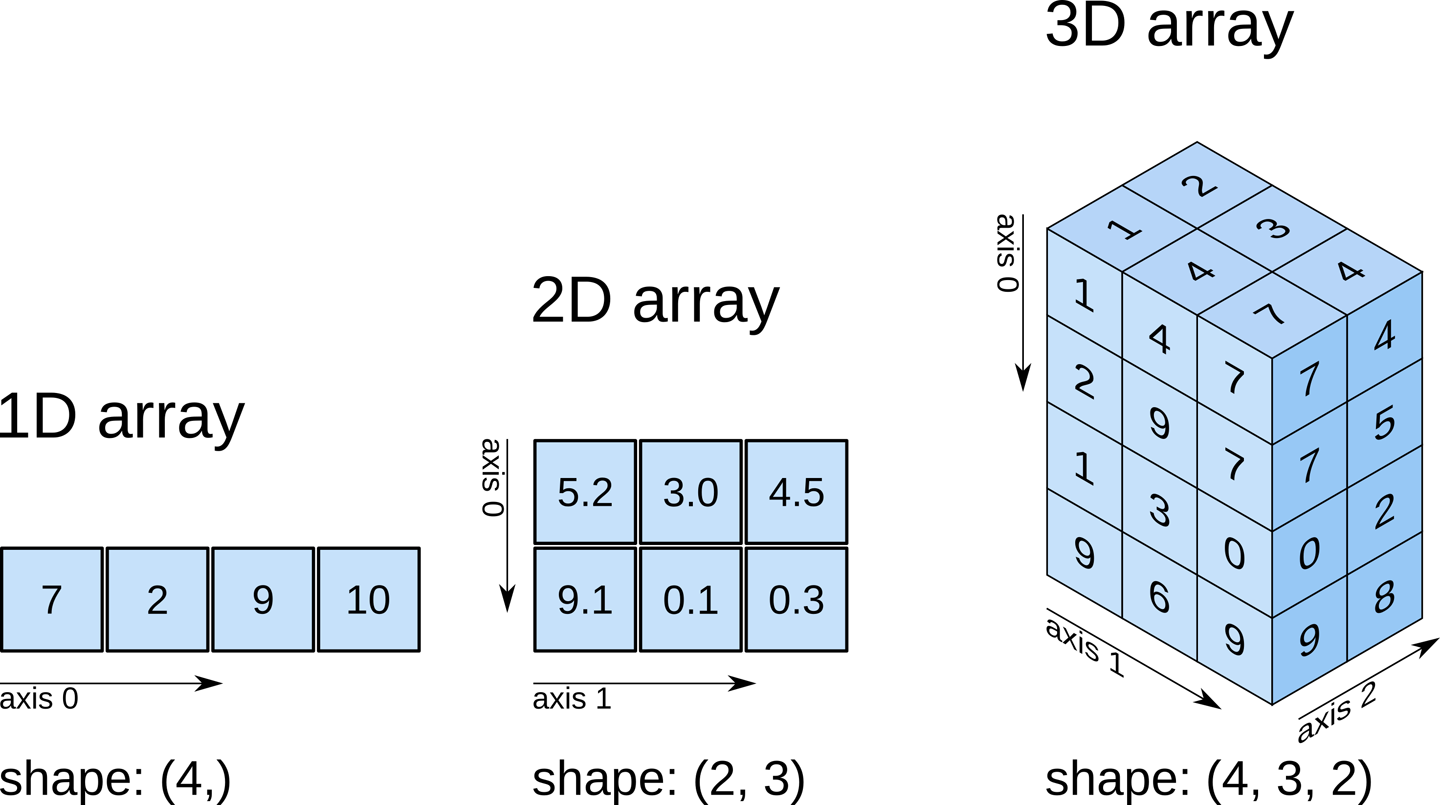


Image credit: https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch01.html

### Wait, what's an array?

In computer science, an array is a data structure consisting of a collection of elements, each identified by an index. 

### How does a NumPy `ndarray` compare to a Python `list` or `array`?
In Python, arrays are most often represented using `list`, which allows for different data types within a single list. (For a refresher on lists, see Session 1 of this course, "Container types - Lists" section). Python standard library does come with its own `array` module which requires that a single array can only contain one data type of elements. Python's `array` is more compact (takes less space in storage) than `list` and comes with some basic math operations. NumPy's `ndarray` is like Python's `array` on steroids, functionality wise.

In [3]:
from array import array
import numpy as np

py_list = [1, 2, '3']
py_array = array('i', [1, 2, 3]) # i indicates integer
np_array = np.array([1, 2, 3])

### How to create a NumPy `ndarray`?

In [ ]:
# give me 3 zeros
np.zeros(3)

array([0., 0., 0.])

In [ ]:
# give me 4 ones
np.ones(4)

array([1., 1., 1., 1.])

In [ ]:
# give me 5 numbers randomly sampled from [0.0, 1.0)
np.random.random(5)

array([0.13353598, 0.86948567, 0.67439914, 0.34367281, 0.68637686])

In [9]:
# give me 4 consecutive numbers
# starts at 0 by default, stop is excluded
one_d_array = np.arange(4)
one_d_array

array([0, 1, 2, 3])

In [7]:
two_d_array = np.array([[1, 2], [3, 4.0]])
two_d_array

array([[1., 2.],
       [3., 4.]])

### How to find attributes of an `ndarray`?

In [ ]:
# dimension
two_d_array.ndim

2

In [ ]:
# shape
two_d_array.shape

(2, 2)

In [5]:
# how many elements total?
two_d_array.size

4

In [8]:
# what's the data type of the elements?
two_d_array.dtype

dtype('float64')

In [10]:
print(f'''Array dimension: {one_d_array.ndim},
      shape: {one_d_array.shape}, 
      size: {one_d_array.size},
      data type: {one_d_array.dtype}''')

Array dimension: 1,
      shape: (4,), 
      size: 4,
      data type: int64


**Note** the lack of `()` in the code cells above. It's because we are invoking attributes, not method/functions on those array objects.

## 2.2. Manipulating and operating on `ndarray`
With basic understanding of ndarray, let's go ahead do some maths with it.

### How to do maths with ndarrays?

In [ ]:
one_d_array

array([0, 1, 2, 3])

In [ ]:
one_d_array.min()

0

In [ ]:
one_d_array.max()

3

In [ ]:
one_d_array.sum()

6

In [ ]:
# broadcasting
one_d_array * 2

array([0, 2, 4, 6])

In [ ]:
# arithmetic operations
one_d_array + one_d_array * 2

array([0, 3, 6, 9])

## 2.3. Universal functions

In NumPy, universal functions (`ufunc`) are functions operate element-wise on an array and produce an output.

Here are some examples:

<p><a href="https://numpy.org/doc/stable/reference/generated/numpy.all.html#numpy.all" title="numpy.all"><code class="xref py py-obj docutils literal notranslate"><span class="pre">all</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.any.html#numpy.any" title="numpy.any"><code class="xref py py-obj docutils literal notranslate"><span class="pre">any</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html#numpy.apply_along_axis" title="numpy.apply_along_axis"><code class="xref py py-obj docutils literal notranslate"><span class="pre">apply_along_axis</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.argmax.html#numpy.argmax" title="numpy.argmax"><code class="xref py py-obj docutils literal notranslate"><span class="pre">argmax</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.argmin.html#numpy.argmin" title="numpy.argmin"><code class="xref py py-obj docutils literal notranslate"><span class="pre">argmin</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.argsort.html#numpy.argsort" title="numpy.argsort"><code class="xref py py-obj docutils literal notranslate"><span class="pre">argsort</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.average.html#numpy.average" title="numpy.average"><code class="xref py py-obj docutils literal notranslate"><span class="pre">average</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.bincount.html#numpy.bincount" title="numpy.bincount"><code class="xref py py-obj docutils literal notranslate"><span class="pre">bincount</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.ceil.html#numpy.ceil" title="numpy.ceil"><code class="xref py py-obj docutils literal notranslate"><span class="pre">ceil</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.clip.html#numpy.clip" title="numpy.clip"><code class="xref py py-obj docutils literal notranslate"><span class="pre">clip</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.conj.html#numpy.conj" title="numpy.conj"><code class="xref py py-obj docutils literal notranslate"><span class="pre">conj</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html#numpy.corrcoef" title="numpy.corrcoef"><code class="xref py py-obj docutils literal notranslate"><span class="pre">corrcoef</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.cov.html#numpy.cov" title="numpy.cov"><code class="xref py py-obj docutils literal notranslate"><span class="pre">cov</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.cross.html#numpy.cross" title="numpy.cross"><code class="xref py py-obj docutils literal notranslate"><span class="pre">cross</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.cumprod.html#numpy.cumprod" title="numpy.cumprod"><code class="xref py py-obj docutils literal notranslate"><span class="pre">cumprod</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html#numpy.cumsum" title="numpy.cumsum"><code class="xref py py-obj docutils literal notranslate"><span class="pre">cumsum</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.diff.html#numpy.diff" title="numpy.diff"><code class="xref py py-obj docutils literal notranslate"><span class="pre">diff</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.floor.html#numpy.floor" title="numpy.floor"><code class="xref py py-obj docutils literal notranslate"><span class="pre">floor</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.inner.html#numpy.inner" title="numpy.inner"><code class="xref py py-obj docutils literal notranslate"><span class="pre">inner</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.invert.html#numpy.invert" title="numpy.invert"><code class="xref py py-obj docutils literal notranslate"><span class="pre">invert</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.lexsort.html#numpy.lexsort" title="numpy.lexsort"><code class="xref py py-obj docutils literal notranslate"><span class="pre">lexsort</span></code></a>,
<a class="reference external" href="https://docs.python.org/3/library/functions.html#max" title="(in Python v3.10)"><code class="xref py py-obj docutils literal notranslate"><span class="pre">max</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.maximum.html#numpy.maximum" title="numpy.maximum"><code class="xref py py-obj docutils literal notranslate"><span class="pre">maximum</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy.mean" title="numpy.mean"><code class="xref py py-obj docutils literal notranslate"><span class="pre">mean</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.median.html#numpy.median" title="numpy.median"><code class="xref py py-obj docutils literal notranslate"><span class="pre">median</span></code></a>,
<a class="reference external" href="https://docs.python.org/3/library/functions.html#min" title="(in Python v3.10)"><code class="xref py py-obj docutils literal notranslate"><span class="pre">min</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.minimum.html#numpy.minimum" title="numpy.minimum"><code class="xref py py-obj docutils literal notranslate"><span class="pre">minimum</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html#numpy.nonzero" title="numpy.nonzero"><code class="xref py py-obj docutils literal notranslate"><span class="pre">nonzero</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.outer.html#numpy.outer" title="numpy.outer"><code class="xref py py-obj docutils literal notranslate"><span class="pre">outer</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.prod.html#numpy.prod" title="numpy.prod"><code class="xref py py-obj docutils literal notranslate"><span class="pre">prod</span></code></a>,
<a class="reference external" href="https://docs.python.org/3/library/re.html#module-re" title="(in Python v3.10)"><code class="xref py py-obj docutils literal notranslate"><span class="pre">re</span></code></a>,
<a class="reference external" href="https://docs.python.org/3/library/functions.html#round" title="(in Python v3.10)"><code class="xref py py-obj docutils literal notranslate"><span class="pre">round</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.sort.html#numpy.sort" title="numpy.sort"><code class="xref py py-obj docutils literal notranslate"><span class="pre">sort</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.std.html#numpy.std" title="numpy.std"><code class="xref py py-obj docutils literal notranslate"><span class="pre">std</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.sum.html#numpy.sum" title="numpy.sum"><code class="xref py py-obj docutils literal notranslate"><span class="pre">sum</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.trace.html#numpy.trace" title="numpy.trace"><code class="xref py py-obj docutils literal notranslate"><span class="pre">trace</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.transpose.html#numpy.transpose" title="numpy.transpose"><code class="xref py py-obj docutils literal notranslate"><span class="pre">transpose</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.var.html#numpy.var" title="numpy.var"><code class="xref py py-obj docutils literal notranslate"><span class="pre">var</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.vdot.html#numpy.vdot" title="numpy.vdot"><code class="xref py py-obj docutils literal notranslate"><span class="pre">vdot</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html#numpy.vectorize" title="numpy.vectorize"><code class="xref py py-obj docutils literal notranslate"><span class="pre">vectorize</span></code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.where.html#numpy.where" title="numpy.where"><code class="xref py py-obj docutils literal notranslate"><span class="pre">where</span></code></a></p>

Most universal functions can operate not only on NumPy arrays (ndarray), but also on Python lists, arrays or any object convertible to a NumPy array:

In [ ]:
# cross product of two vectors
np.cross([3, 0, 2], [-1, 4, 2])

array([-8, -8, 12])

More usage examples of universal functions:

In [ ]:
# reverse an array
np.flip(one_d_array)

array([3, 2, 1, 0])

In [ ]:
# sort an array, default ascending
np.sort(np.random.random(5))

array([0.05929896, 0.30172645, 0.39046874, 0.77738081, 0.80239677])

In [ ]:
# get the index of the max element
one_to_nine = np.arange(1, 10)
np.argmax(one_to_nine)

8

In [ ]:
# look up the element by index
one_to_nine[np.argmax(one_to_nine)]

9

In [ ]:
# check if any of the element evaluates to true
np.any([False, 0])

False

In [ ]:
# check if all of the elements evaluate to true
np.all([True, 3, np.nan])

True

In [ ]:
# pair-wise element comparison
np.greater([1, 2, 3], [1, 2, 1])

array([False, False,  True])

In [ ]:
# Does any of the pair-wise comparison evaluate to true?
np.any(np.greater([1, 2, 3], [1, 2, 1]))

True

## 2.4. Exercises: vector dot product

**Task**: Calculate the **dot product** of vector `(1, 2, 3)` with itself. 

The dot product of two vectors $\mathbf{\color{red}a}=[a_1, a_2, \cdots, a_n]$ and $\mathbf{\color{blue}b} = [b_1, b_2, \cdots, b_n]$ is defined as:

$\mathbf{\color{red}a}\cdot\mathbf{\color{blue}b}=\sum_{i=1}^n {\color{red}a}_i{\color{blue}b}_i={\color{red}a}_1{\color{blue}b}_1+{\color{red}a}_2{\color{blue}b}_2+\cdots+{\color{red}a}_n{\color{blue}b}_n$

The following exercises are meant to be completed step by step. Upon successful completion of all steps, the last cell should execute without any `AssertionError` or the prompt "Remove this line after filling in your own code".

**Tip**: Make use of the "hints" given as comments in each code cell. You can always invoke `?` to bring up the documentation for any function in colab, e.g. `np.array?`, `np.arange?`

### Step 1. 

Represent vector `(1, 2, 3)` as a 1-d NumPy array of shape (3, ) and store in variable `a`:

In [ ]:
%%script echo Remove this line after filling in your own code
# hint: use np.array or np.arange
# Your code here

# === Do not modify code below ===
assert a.shape == (3, )
assert a[0] == 1
assert a[1] == 2

Remove this line after filling in your own code


### Step 2. 

Implement the dot product calculation and store the result in variable `result`:

In [ ]:
%%script echo Remove this line after filling in your own code
# hint: Use *, then sum or np.sum. 
#       Alternatively use one of NumPy's universal functions
# Your code here

# === Do not modify code below ===
assert result == 14

Remove this line after filling in your own code


# 3.&nbsp;Pandas

<img src="https://miro.medium.com/max/1400/1*6d5dw6dPhy4vBp2vRW6uzw.png" width=800 />

Image credit: https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb

Datasets we often work with come in tabular form – think Excel/Google spreadsheets – and with mixed data types, some numerical, some categorical, some textual. Before we can perform fancy mathematical operations and meaningful analysis on such data using NumPy and other python libraries, we usually need to understand and preprocess the data first. This process involves operations such as cleaning, reshaping, filtering, and subsetting. This is where Pandas comes in.

Aside: Why is such a data analysis library named Pandas? Apparently the name is derived from the term "panel data".

Like `ndarray` is the basic building block of NumPy, `Series` and `DataFrame` are the basic building blocks of Pandas. 

## 3.1. Series

`Series` is a one-dimensional **labeled** array capable of holding **any data type**. The axis labels are collectively referred to as the index. 

### Can I create Series from ndarrays?

In [ ]:
import pandas as pd
import numpy as np

# specify the labels through the `index` argument
labelled_series = pd.Series(np.arange(1, 4), index=["r1", "r2", "r3"])
labelled_series

r1    1
r2    2
r3    3
dtype: int64

In [ ]:
# by default, integer sequence starting from 0 is used as labels
default_series = pd.Series(np.arange(1, 4))
default_series

0    1
1    2
2    3
dtype: int64

In [ ]:
# Individual elements can be looked up using labels
labelled_series["r2"]

2

In [ ]:
default_series[2]

3

### Can I recover the ndarray from a series?

In [ ]:
labelled_series.to_numpy()

array([1, 2, 3])

In [ ]:
# alternatively
labelled_series.values

array([1, 2, 3])

### Can I apply the same transformation on every element in a Series?

It's similar to iterating through a list with a `for` or `while` loop, but in tabular data, the mindset is to apply the same `function` on every element in a Series. Why the change of mindset? The short answer is that it allows the library to perform the operations faster through parallel processing. For technical details, refer to [this blog post](https://medium.com/analytics-vidhya/understanding-vectorization-in-numpy-and-pandas-188b6ebc5398) (which also links to a talk specifically on such optimization approach known as vectorization).

Here's an example of transforming a list of strings to UPPERCASE using a `for` loop:

In [ ]:
angry_libs = []
for lib in ['numpy', 'pandas']:
  angry_libs.append(lib.upper())
angry_libs

['NUMPY', 'PANDAS']

Here's how we would do it on a Series:

In [ ]:
pd.Series(['numpy', 'pandas']).map(str.upper)

0     NUMPY
1    PANDAS
dtype: object

Let's break it down:

In [ ]:
libraries = pd.Series(['numpy', 'pandas'])
libraries

0     numpy
1    pandas
dtype: object

In [ ]:
str.upper

<method 'upper' of 'str' objects>

In [ ]:
libraries.map(str.upper)

0     NUMPY
1    PANDAS
dtype: object

## 3.2. DataFrame

`DataFrame` is a 2-dimensional **labeled** data structure with **columns of potentially different types**. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.

### 3.2.1. Creating DataFrames

There are many ways to create a `DataFrame`. Let's look at some examples with the data types we are already familiar with.

#### Can I create a DataFrame from Series?

In [ ]:
df_from_series = pd.DataFrame({"c1": labelled_series, "c2": labelled_series * 2})
df_from_series

,c1,c2
r1,1,2
r2,2,4
r3,3,6


In [ ]:
df_from_series.columns

Index(['c1', 'c2'], dtype='object')

In [ ]:
df_from_series.index

Index(['r1', 'r2', 'r3'], dtype='object')

#### Can I create a DataFrame from an ndarray?

In [ ]:
raw_values = np.arange(1, 7).reshape(2, -1)
raw_values

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
df_from_ndarray = pd.DataFrame(raw_values, columns=['A', 'B', 'C'])
df_from_ndarray

,A,B,C
0,1,2,3
1,4,5,6


To recover the raw values from a `DataFrame`:

In [ ]:
df_from_ndarray.values

array([[1, 2, 3],
       [4, 5, 6]])

#### Can I create a DataFrame from lists?

In [ ]:
pd.DataFrame({"ID": [1, 2], "Name": ["dog", "cat"], "Needs Walking": [True, False]})

,ID,Name,Needs Walking
0,1,dog,True
1,2,cat,False


#### Can I create a DataFrame from a file?

In [ ]:
file_url = 'https://raw.githubusercontent.com/worldbank/dec-python-course/main/1-foundations/3-numpy-and-pandas/data/Singapore_Annual_New_Car_Registrations_by_make_type.csv'
singapore_cars = pd.read_csv(file_url)
singapore_cars

,year,make,fuel,type,number
0,2015,ALFA ROMEO,Petrol,Hatchback,29.0
1,2015,ASTON MARTIN,Petrol,Hatchback,3.0
2,2015,AUDI,Petrol,Hatchback,262.0
3,2015,AUSTIN,Petrol,Hatchback,1.0
4,2015,B.M.W.,Petrol,Hatchback,408.0
...,...,...,...,...,...
2805,2021,TOYOTA,Others,Coupe/ Convertible,NaN
2806,2021,VOLKSWAGEN,Petrol,Coupe/ Convertible,2.0
2807,2021,VOLKSWAGEN,Others,Coupe/ Convertible,1.0
2808,2021,VOLVO,Petrol,Coupe/ Convertible,2.0


To save a `DataFrame` as a csv file:

In [ ]:
singapore_cars.to_csv('singapore_cars.csv')

In Colab, navigate to the folder icon in the left pane to find and download the exported csv file. 

### 3.2.2. Inspecting the data

Now let's perform some basic inspection to understand our dataset.

#### How many rows and columns?

In [ ]:
singapore_cars.shape

(2810, 5)

In [ ]:
nrow, ncol = singapore_cars.shape
print(f'nrow={nrow}, ncol={ncol}')

nrow=2810, ncol=5


#### What are the column names?

In [ ]:
singapore_cars.columns

Index(['year', 'make', 'fuel', 'type', 'number'], dtype='object')

#### What does the data look like?

From the top:

In [ ]:
singapore_cars.head()

,year,make,fuel,type,number
0,2015,ALFA ROMEO,Petrol,Hatchback,29.0
1,2015,ASTON MARTIN,Petrol,Hatchback,3.0
2,2015,AUDI,Petrol,Hatchback,262.0
3,2015,AUSTIN,Petrol,Hatchback,1.0
4,2015,B.M.W.,Petrol,Hatchback,408.0


From the bottom:

In [ ]:
# Optionally specify the exact number of rows you want
singapore_cars.tail(3)

,year,make,fuel,type,number
2807,2021,VOLKSWAGEN,Others,Coupe/ Convertible,1.0
2808,2021,VOLVO,Petrol,Coupe/ Convertible,2.0
2809,2021,VOLVO,Others,Coupe/ Convertible,NaN


#### What type of data does each column currently hold and how many missing values?


In [ ]:
singapore_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    2810 non-null   int64  
 1   make    2810 non-null   object 
 2   fuel    2810 non-null   object 
 3   type    2810 non-null   object 
 4   number  1432 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 109.9+ KB


### 3.2.3. Subsetting the data

A crucial part of working with DataFrames is extracting subsets of the data: finding rows that meet a certain set of criteria, isolating columns/rows of interest, etc. After narrowing down our data, we are closer to discovering insights. This section will be the backbone of many analysis tasks.

#### How to select columns?

To select a single column (returns a `Series`):

In [ ]:
singapore_cars.make

0         ALFA ROMEO
1       ASTON MARTIN
2               AUDI
3             AUSTIN
4             B.M.W.
            ...     
2805          TOYOTA
2806      VOLKSWAGEN
2807      VOLKSWAGEN
2808           VOLVO
2809           VOLVO
Name: make, Length: 2810, dtype: object

In [ ]:
# Alternatively
singapore_cars['make']

0         ALFA ROMEO
1       ASTON MARTIN
2               AUDI
3             AUSTIN
4             B.M.W.
            ...     
2805          TOYOTA
2806      VOLKSWAGEN
2807      VOLKSWAGEN
2808           VOLVO
2809           VOLVO
Name: make, Length: 2810, dtype: object

The dictionary accessor is useful when the column name is not a valid Python variable, or when selecting multiple columns:

In [ ]:
singapore_cars[['make', 'fuel', 'type']]

,make,fuel,type
0,ALFA ROMEO,Petrol,Hatchback
1,ASTON MARTIN,Petrol,Hatchback
2,AUDI,Petrol,Hatchback
3,AUSTIN,Petrol,Hatchback
4,B.M.W.,Petrol,Hatchback
...,...,...,...
2805,TOYOTA,Others,Coupe/ Convertible
2806,VOLKSWAGEN,Petrol,Coupe/ Convertible
2807,VOLKSWAGEN,Others,Coupe/ Convertible
2808,VOLVO,Petrol,Coupe/ Convertible


#### How to select rows?
If the index are default sequential integers, simply select as if you are selecting from an array:

In [ ]:
singapore_cars[100:200]

,year,make,fuel,type,number
100,2015,MERCEDES BENZ,Petrol,Multi-purpose Vehicle/Station-wagon,61.0
101,2015,MERCEDES BENZ,Diesel,Multi-purpose Vehicle/Station-wagon,12.0
102,2015,NISSAN,Petrol,Multi-purpose Vehicle/Station-wagon,103.0
103,2015,NISSAN,Others,Multi-purpose Vehicle/Station-wagon,21.0
104,2015,OPEL,Petrol,Multi-purpose Vehicle/Station-wagon,25.0
...,...,...,...,...,...
195,2016,B.M.W.,Diesel,Hatchback,949.0
196,2016,B.M.W.,Others,Hatchback,6.0
197,2016,BYD,Others,Hatchback,7.0
198,2016,CHERY,Petrol,Hatchback,6.0


#### How to select by columns and rows (aka indexing)?

Sometimes we want a specific "section" of the `DataFrame`, say the first 3 rows with just the middle 3 columns:

In [ ]:
singapore_cars.iloc[0:3, 1:4]

,make,fuel,type
0,ALFA ROMEO,Petrol,Hatchback
1,ASTON MARTIN,Petrol,Hatchback
2,AUDI,Petrol,Hatchback


**Note** that it's not `()` that follows `iloc` but `[]`. This is because `iloc` is not a function/method, but a property on the DataFrame object.

We use `iloc` to select by row and column's positions above; use `loc` to select by row and column's names/labels:

In [ ]:
singapore_cars.loc[10:15, ['year', 'number']]

,year,number
10,2015,10.0
11,2015,4.0
12,2015,1.0
13,2015,2.0
14,2015,155.0
15,2015,1068.0


In this case the rows' positions happen to be the same as the rows' names/labels. 

**Important**: when selecting by position (`iloc`) only the start point is included, the end point is excluded. When selecting by name/label (`loc`), both start and end points are included.

#### How to filter rows based on conditions?

This is useful when we want to zoom in to explore a subset of the data satisfying some condition(s). For example, to get only 2021 data on petrol cars:

In [ ]:
singapore_cars[(singapore_cars.year == 2021) & (singapore_cars.fuel == 'Petrol')]

,year,make,fuel,type,number
2375,2021,ALFA ROMEO,Petrol,Hatchback,NaN
2377,2021,ALPINE,Petrol,Hatchback,NaN
2378,2021,ASTON MARTIN,Petrol,Hatchback,NaN
2379,2021,AUDI,Petrol,Hatchback,34.0
2381,2021,AUSTIN,Petrol,Hatchback,1.0
...,...,...,...,...,...
2798,2021,SUBARU,Petrol,Coupe/ Convertible,NaN
2800,2021,SUZUKI,Petrol,Coupe/ Convertible,NaN
2803,2021,TOYOTA,Petrol,Coupe/ Convertible,27.0
2806,2021,VOLKSWAGEN,Petrol,Coupe/ Convertible,2.0


**Important**: Take note of the syntax here. We surround each condition with parentheses, and we use bitwise operators (`&`, `|`, `~`) instead of logical operators (`and`, `or`, `not`).

This mode of row selection/filtering is called "boolean indexing" because the selection is based on the specified condition evaluating to `True` or `False` (aka boolean). Rows that satisfy the condition are selected; those do not are filtered out. You can see the condition for the above example gets evaluated for each row as `True`/`False`:

In [ ]:
(singapore_cars.year == 2021) & (singapore_cars.fuel == 'Petrol')

0       False
1       False
2       False
3       False
4       False
        ...  
2805    False
2806     True
2807    False
2808     True
2809    False
Length: 2810, dtype: bool

Think of `True` as 1 and `False` as 0, summing along the resulting `Series` gives us the number of rows that satisfy our condition, which matches our boolean indexing results above:

In [ ]:
sum((singapore_cars.year == 2021) & (singapore_cars.fuel == 'Petrol'))

235

### 3.2.4. Exploring the data

Exploratory analysis is crucial in understanding the data. Pandas provides functions such as `value_counts`, `nunique`, `describe` alongside common summary statistical functions including `max`, `min`, `mean`, `median` to help us with the process.

First, recall the `number` column has many missing values, which means those records do not correspond to any registration:

In [ ]:
singapore_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    2810 non-null   int64  
 1   make    2810 non-null   object 
 2   fuel    2810 non-null   object 
 3   type    2810 non-null   object 
 4   number  1432 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 109.9+ KB


Let's filter them out using boolean indexing:

In [ ]:
singapore_cars_cleaned = singapore_cars[~np.isnan(singapore_cars.number)]
singapore_cars_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 0 to 2808
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1432 non-null   int64  
 1   make    1432 non-null   object 
 2   fuel    1432 non-null   object 
 3   type    1432 non-null   object 
 4   number  1432 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 67.1+ KB


Note the use of NumPy's universal function `np.isnan` on the numbers column (which is a Series). Boolean indexing just needs each row to evaluate to `True` or `False`, so any NumPy or Pandas function that operates on a Series and returns another Series of boolean can be used. This will be useful to keep in mind for the exercises coming right up!

#### How many unique rows?

How many different types and makes of cars are registered in Singapore over time?

In [ ]:
singapore_cars_cleaned.year.value_counts()

2017    232
2021    219
2018    199
2019    198
2016    197
2020    196
2015    191
Name: year, dtype: int64

Seems like the number of different types and makes of cars registered in Signapore are fairly constant over time. Just to be sure, we can check the breakdown in percentage:

In [ ]:
singapore_cars_cleaned.year.value_counts(normalize=True)

2017    0.162011
2021    0.152933
2018    0.138966
2019    0.138268
2016    0.137570
2020    0.136872
2015    0.133380
Name: year, dtype: float64

Let's drill down to the 2021 registration data:

In [ ]:
singapore_cars_2021 = singapore_cars_cleaned[singapore_cars_cleaned.year == 2021]
singapore_cars_2021

,year,make,fuel,type,number
2379,2021,AUDI,Petrol,Hatchback,34.0
2380,2021,AUDI,Others,Hatchback,339.0
2381,2021,AUSTIN,Petrol,Hatchback,1.0
2382,2021,B.M.W.,Petrol,Hatchback,1438.0
2384,2021,B.M.W.,Others,Hatchback,9.0
...,...,...,...,...,...
2791,2021,ROLLS ROYCE,Petrol,Coupe/ Convertible,23.0
2803,2021,TOYOTA,Petrol,Coupe/ Convertible,27.0
2806,2021,VOLKSWAGEN,Petrol,Coupe/ Convertible,2.0
2807,2021,VOLKSWAGEN,Others,Coupe/ Convertible,1.0


What are the unique makes registered in 2021?

In [ ]:
singapore_cars_2021.make.unique()

array(['AUDI', 'AUSTIN', 'B.M.W.', 'BLUECAR', 'BYD', 'FIAT', 'FORD',
       'HONDA', 'HYUNDAI', 'KIA', 'MAZDA', 'MERCEDES BENZ', 'MINI',
       'MITSUBISHI', 'NISSAN', 'OPEL', 'PERODUA', 'PEUGEOT', 'PORSCHE',
       'RENAULT', 'SEAT', 'SKODA', 'SUBARU', 'SUZUKI', 'TESLA', 'TOYOTA',
       'VOLKSWAGEN', 'ALFA ROMEO', 'BENTLEY', 'CITROEN', 'DATSUN',
       'INFINITI', 'JAGUAR', 'MASERATI', 'MITSUOKA', 'POLESTAR',
       'ROLLS ROYCE', 'VOLVO', 'LAND ROVER', 'M.G.', 'MAXUS', 'SSANGYONG',
       'ASTON MARTIN', 'JEEP', 'LAMBORGHINI', 'ALPINA', 'ALPINE',
       'DAIHATSU', 'FERRARI', 'LOTUS', 'Mclaren', 'MORGAN'], dtype=object)

How many unique values are there?

In [ ]:
singapore_cars_2021.make.nunique()

52

#### How to calculate summary statistics?

We can find basic statistics like we did on an `ndarray`, for example, finding the maximum number of cars registered in 2021 by make, fuel and type:

In [ ]:
singapore_cars_2021.number.max()

2557.0

What is this most popular car (make-fule-type)?

In [ ]:
singapore_cars_2021.iloc[singapore_cars_2021.number.argmax(), ]

year                        2021
make               MERCEDES BENZ
fuel                      Petrol
type      Sports Utility Vehicle
number                    2557.0
Name: 2684, dtype: object

Going back to the all-time cleaned dataset, to quickly get common summary statistics for all columns at once:

In [ ]:
singapore_cars_cleaned.describe(include='all')

,year,make,fuel,type,number
count,1432.00000,1432,1432,1432,1432.000000
unique,NaN,71,3,5,NaN
top,NaN,B.M.W.,Petrol,Sports Utility Vehicle,NaN
freq,NaN,82,950,351,NaN
mean,2018.03352,NaN,NaN,NaN,334.879190
std,1.99412,NaN,NaN,NaN,820.163665
min,2015.00000,NaN,NaN,NaN,1.000000
25%,2016.00000,NaN,NaN,NaN,5.000000
50%,2018.00000,NaN,NaN,NaN,34.000000
75%,2020.00000,NaN,NaN,NaN,235.250000


**Important**: NaN values signify missing data. For instance, the categorical/string columns such as `make`, `fuel` have no value for `mean`, `std` etc; likewise, numeric columns such as `number` and `year` have no entries for the categorical summary statistics (`unique`, `top`, `freq`).

### 3.2.5. Exercises: read and explore excel data

Let's first prepare our environment with the latest version of the xlrd library. It's for reading data and formatting information from Excel files in the historical .xls format. After the installation completes, you will see a "RESTART RUNTIME" button, click on it to restart the environment so we can start using the newly installed library.

In [ ]:
!pip install xlrd --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


#### Step 1.

Create a `DataFrame` by reading in the excel file from the given URL stored in the `exercise_data_url` variable. There are 3 sheets in the excel file, we only want the last sheet.

Store the resulting DataFrame in a variable named `sg_cars_excel`:


In [ ]:
%%script echo Remove this line after filling in your own code

import pandas as pd

exercise_data_url = 'https://raw.githubusercontent.com/worldbank/dec-python-course/main/1-foundations/3-numpy-and-pandas/data/Singapore_Annual_New_Car_Registrations_by_make_type.xls'

# hint: use pd.read_excel, note sheet index starts with 0
# Your code here

assert sg_cars_excel.shape == (79, 12)

Remove this line after filling in your own code


#### Step 2.

Inspect the first 3 and last 5 rows of `sg_cars_excel`:

In [ ]:
%%script echo Remove this line after filling in your own code

# hint: use head
# Your code here

Remove this line after filling in your own code


In [ ]:
%%script echo Remove this line after filling in your own code

# hint: use tail
# Your code here

Remove this line after filling in your own code


#### Step 3.

Notice the first value row in `sg_cars_excel` is in fact the years and should be used as the column names. The DataFrame also contains 3 footer rows we want to exclude. Fix it by re-reading the excel file with additional parameters.

Store the fixed DataFrame in `sg_cars_excel_fixed`:

In [ ]:
%%script echo Remove this line after filling in your own code

# hint: check out pd.read_excel's arguments: header=, skipfooter=
# Your code here

assert sg_cars_excel_fixed.columns[1] == 2011
assert sg_cars_excel_fixed.Make.iloc[0] == 'Alfa Romeo'
assert sg_cars_excel_fixed.columns[-1] == 2021
assert sg_cars_excel_fixed.Make.iloc[-1] == 'Others'
assert sg_cars_excel_fixed.shape == (75, 12)

Remove this line after filling in your own code


#### Step 4.

Inspect the summary statistics for every year in `sg_cars_excel_fixed`:

In [ ]:
%%script echo Remove this line after filling in your own code

# hint: use describe
# Your code here

Remove this line after filling in your own code


#### Step 5.

Within the dataframe `sg_cars_excel_fixed`, isolate the annual numbers of new car registrations for the following 3 makes: "Mercedes Benz", "Toyota", "Kia" for all years. Store the resulting DataFrame in variable `sg_cars_excel_subset`:

In [ ]:
%%script echo Remove this line after filling in your own code

# hint: use boolean indexing with .isin function on the make column
#       You can run pd.Series.isin? to find documentation and usage examples
# Your code here

assert sg_cars_excel_subset.shape == (3, 12)
assert "Mercedes Benz" in sg_cars_excel_subset.Make.values
assert "Toyota" in sg_cars_excel_subset.Make.values
assert "Kia" in sg_cars_excel_subset.Make.values

Remove this line after filling in your own code


#### Step 6.

Only select the `Make` column and year 2019, 2020, and 2021 from the `sg_cars_excel_subset` DataFrame.

Store the result in variable `sg_cars_excel_subsubset`:

In [ ]:
%%script echo Remove this line after filling in your own code

# hint: use column selection
# Your code here

assert sg_cars_excel_subsubset.shape == (3, 4)
assert sg_cars_excel_subsubset.columns.to_list() == ['Make', 2019, 2020, 2021]

Remove this line after filling in your own code


## 3.3. Data Wrangling

All that we have learned so far gives us some basic understand of data. Next let's find out how to perform data wrangling, including data cleaning, grouping, reshaping, merging and concatenation using Pandas.

### 3.3.1. Data Cleaning

In this section, we will take a look at dropping missing values; creating, renaming, and dropping columns; type conversion; and sorting – all of which make our analysis easier. We will be working with the Singapore monthly new car registration data – a dataset similar to the annual car registration data we worked previously, just more granular.

In [ ]:
import pandas as pd
import numpy as np

cars_monthly = pd.read_csv('https://raw.githubusercontent.com/worldbank/dec-python-course/main/1-foundations/3-numpy-and-pandas/data/Singapore_Monthly_New_Car_Registrations_by_make_type.csv')
cars_monthly

,month,make,fuel_type,vehicle_type,number
0,2016-01,ALFA ROMEO,Petrol,Hatchback,3.0
1,2016-01,ALPINA,Petrol,Hatchback,0.0
2,2016-01,ASTON MARTIN,Petrol,Hatchback,0.0
3,2016-01,AUDI,Petrol,Hatchback,45.0
4,2016-01,B.M.W.,Petrol,Hatchback,5.0
...,...,...,...,...,...
27910,2022-06,TRIUMPH,Petrol,Coupe/ Convertible,1.0
27911,2022-06,VOLKSWAGEN,Petrol,Coupe/ Convertible,NaN
27912,2022-06,VOLKSWAGEN,Others,Coupe/ Convertible,NaN
27913,2022-06,VOLVO,Petrol,Coupe/ Convertible,NaN


In [ ]:
cars_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27915 entries, 0 to 27914
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         27915 non-null  object 
 1   make          27915 non-null  object 
 2   fuel_type     27915 non-null  object 
 3   vehicle_type  27915 non-null  object 
 4   number        16835 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


#### **Handling missing values**

There are multiple approaches to handle missing values – see [Pandas' user guide on working with missing data](https://pandas.pydata.org/docs/user_guide/missing_data.html) for more details. In our case let's drop the rows with missing values for the `number` column, as those records indicate there is no corresponding car registration for that month, make, fuel and vehicle type:

In [ ]:
cars_monthly.dropna(subset=['number'])

,month,make,fuel_type,vehicle_type,number
0,2016-01,ALFA ROMEO,Petrol,Hatchback,3.0
1,2016-01,ALPINA,Petrol,Hatchback,0.0
2,2016-01,ASTON MARTIN,Petrol,Hatchback,0.0
3,2016-01,AUDI,Petrol,Hatchback,45.0
4,2016-01,B.M.W.,Petrol,Hatchback,5.0
...,...,...,...,...,...
27876,2022-06,MERCEDES BENZ,Others,Coupe/ Convertible,12.0
27879,2022-06,MITSUBISHI,Petrol,Coupe/ Convertible,1.0
27890,2022-06,PORSCHE,Petrol,Coupe/ Convertible,31.0
27907,2022-06,TOYOTA,Petrol,Coupe/ Convertible,2.0


The argument `subset` here indicates which columns to evaluate for `na` values. If not specified, by default `dropna` will drop any row with any column containing `na` values.

The call to `dropna` by default also does not modify the original `DataFrame`; it returns a new `DataFrame` with `na` values dropped.

In [ ]:
cars_monthly.shape

(27915, 5)

We can assign the returned `DataFrame` to a new variable, or we can tell `dropna` to modify the original `DataFrame` by passing the `inplace=True` parameter:

In [ ]:
cars_monthly.dropna(subset=['number'], inplace=True)
cars_monthly.shape

(16835, 5)

#### **Renaming columns**

Let's rename the `month` column to `year_month`:

In [ ]:
cars_monthly_renamed = cars_monthly.rename(columns={'month': 'year_month'})
cars_monthly_renamed.columns

Index(['year_month', 'make', 'fuel_type', 'vehicle_type', 'number'], dtype='object')

#### **Creating columns**

Let's create separate columns for year and month from the `year_month` column:

In [ ]:
cars_monthly_renamed[['year','month']] = cars_monthly_renamed.year_month.str.split("-", expand=True)
cars_monthly_renamed

,year_month,make,fuel_type,vehicle_type,number,year,month
0,2016-01,ALFA ROMEO,Petrol,Hatchback,3.0,2016,01
1,2016-01,ALPINA,Petrol,Hatchback,0.0,2016,01
2,2016-01,ASTON MARTIN,Petrol,Hatchback,0.0,2016,01
3,2016-01,AUDI,Petrol,Hatchback,45.0,2016,01
4,2016-01,B.M.W.,Petrol,Hatchback,5.0,2016,01
...,...,...,...,...,...,...,...
27876,2022-06,MERCEDES BENZ,Others,Coupe/ Convertible,12.0,2022,06
27879,2022-06,MITSUBISHI,Petrol,Coupe/ Convertible,1.0,2022,06
27890,2022-06,PORSCHE,Petrol,Coupe/ Convertible,31.0,2022,06
27907,2022-06,TOYOTA,Petrol,Coupe/ Convertible,2.0,2022,06


#### **Dropping columns**

Now we can drop the redundant `year_month` column:

In [ ]:
cars_monthly_dropped = cars_monthly_renamed.drop(columns=['year_month'])
cars_monthly_dropped

,make,fuel_type,vehicle_type,number,year,month
0,ALFA ROMEO,Petrol,Hatchback,3.0,2016,01
1,ALPINA,Petrol,Hatchback,0.0,2016,01
2,ASTON MARTIN,Petrol,Hatchback,0.0,2016,01
3,AUDI,Petrol,Hatchback,45.0,2016,01
4,B.M.W.,Petrol,Hatchback,5.0,2016,01
...,...,...,...,...,...,...
27876,MERCEDES BENZ,Others,Coupe/ Convertible,12.0,2022,06
27879,MITSUBISHI,Petrol,Coupe/ Convertible,1.0,2022,06
27890,PORSCHE,Petrol,Coupe/ Convertible,31.0,2022,06
27907,TOYOTA,Petrol,Coupe/ Convertible,2.0,2022,06


#### **Reordering columns**

It feels odd to have the `year` and `month` columns at the end. Let's move them to the front:

In [ ]:
columns_ordered = ['year', 'month', 'make', 'fuel_type', 'vehicle_type', 'number']
cars_monthly_reordered = cars_monthly_dropped.reindex(columns=columns_ordered)
cars_monthly_reordered

,year,month,make,fuel_type,vehicle_type,number
0,2016,01,ALFA ROMEO,Petrol,Hatchback,3.0
1,2016,01,ALPINA,Petrol,Hatchback,0.0
2,2016,01,ASTON MARTIN,Petrol,Hatchback,0.0
3,2016,01,AUDI,Petrol,Hatchback,45.0
4,2016,01,B.M.W.,Petrol,Hatchback,5.0
...,...,...,...,...,...,...
27876,2022,06,MERCEDES BENZ,Others,Coupe/ Convertible,12.0
27879,2022,06,MITSUBISHI,Petrol,Coupe/ Convertible,1.0
27890,2022,06,PORSCHE,Petrol,Coupe/ Convertible,31.0
27907,2022,06,TOYOTA,Petrol,Coupe/ Convertible,2.0


#### **Converting data types**

Notice the `number` column is of type `float64`:

In [ ]:
cars_monthly_reordered.dtypes

year             object
month            object
make             object
fuel_type        object
vehicle_type     object
number          float64
dtype: object

Theoretically the numbers of car registration in a month should be integers. Let's double check just to be sure:

In [ ]:
cars_monthly_reordered.number.map(float.is_integer).all()

True

Let's convert the `number`, `year`, `month` columns' types to be integer:

In [ ]:
cars_monthly_converted = cars_monthly_reordered.astype({
    'number': 'int', 'year': 'int', 'month': 'int'})
cars_monthly_converted.dtypes

year             int64
month            int64
make            object
fuel_type       object
vehicle_type    object
number           int64
dtype: object

We will leave the rest of the columns as-is. It's tempting to convert them to `string` type but `string` type requires specifying max length, so we will keep them as `object` since it allows for variable length among column values.

#### **Sorting by values**

We can sort by the values of any column(s). To sort by the number of registrations in descending order:

In [ ]:
cars_monthly_sorted = cars_monthly_converted.sort_values(['number', 'year', 'month'], ascending=[False, True, True])
cars_monthly_sorted

,year,month,make,fuel_type,vehicle_type,number
1581,2016,5,HONDA,Petrol,Sports Utility Vehicle,1198
1921,2016,6,HONDA,Petrol,Sports Utility Vehicle,986
901,2016,3,HONDA,Petrol,Sports Utility Vehicle,954
3427,2016,10,HONDA,Petrol,Sports Utility Vehicle,950
1488,2016,5,TOYOTA,Petrol,Sedan,906
...,...,...,...,...,...,...
10429,2018,6,TOYOTA,Diesel,Coupe/ Convertible,0
10430,2018,6,TOYOTA,Others,Coupe/ Convertible,0
10431,2018,6,TRIUMPH,Petrol,Coupe/ Convertible,0
10433,2018,6,VOLKSWAGEN,Diesel,Coupe/ Convertible,0


This could be helpful in discovering possible data integrity issues. For example, we notice here there are entries with `number=0` which we can remove from the dataset:

In [ ]:
cars_monthly_nonzero = cars_monthly_sorted[cars_monthly_sorted.number > 0]
cars_monthly_nonzero

,year,month,make,fuel_type,vehicle_type,number
1581,2016,5,HONDA,Petrol,Sports Utility Vehicle,1198
1921,2016,6,HONDA,Petrol,Sports Utility Vehicle,986
901,2016,3,HONDA,Petrol,Sports Utility Vehicle,954
3427,2016,10,HONDA,Petrol,Sports Utility Vehicle,950
1488,2016,5,TOYOTA,Petrol,Sedan,906
...,...,...,...,...,...,...
27868,2022,6,MASERATI,Petrol,Coupe/ Convertible,1
27873,2022,6,MCLAREN,Petrol,Coupe/ Convertible,1
27875,2022,6,MERCEDES BENZ,Diesel,Coupe/ Convertible,1
27879,2022,6,MITSUBISHI,Petrol,Coupe/ Convertible,1


We can also pick out the smallest/largest rows for similar data integrity checks:

In [ ]:
cars_monthly_nonzero.month.nsmallest(3)

221      1
12489    1
128      1
Name: month, dtype: int64

In [ ]:
cars_monthly_nonzero.month.nlargest(3)

4054    12
4085    12
8492    12
Name: month, dtype: int64

### 3.3.2. Aggregation & Grouping

In this section, we will explore using pivot tables, crosstabs, and group by operations to aggregate the data.

#### **`pivot_table`**

To get the aggregated number of new car registrations by make and year, using `pivot_table`:

In [ ]:
cars_monthly_pivoted = cars_monthly_nonzero.pivot_table(index='make', columns='year', values='number', aggfunc='sum')
cars_monthly_pivoted

year,2016,2017,2018,2019,2020,2021,2022
make,,,,,,,
ALFA ROMEO,39.0,12.0,50.0,60.0,39.0,37.0,9.0
ALPINA,12.0,23.0,11.0,2.0,8.0,2.0,NaN
ALPINE,NaN,NaN,NaN,14.0,7.0,11.0,3.0
ASTON MARTIN,14.0,29.0,26.0,21.0,28.0,27.0,16.0
AUDI,2360.0,2604.0,2941.0,2487.0,2228.0,1975.0,445.0
...,...,...,...,...,...,...,...
TESLA,3.0,NaN,4.0,14.0,20.0,924.0,315.0
TOYOTA,18491.0,19133.0,13817.0,12923.0,7704.0,9633.0,3545.0
TRIUMPH,1.0,3.0,2.0,NaN,1.0,NaN,2.0


#### **`crosstab`**

The Same can be achieve with the `pd.crosstab` function, but with different arguments:

In [ ]:
pd.crosstab(index=cars_monthly_nonzero.make,
            columns=cars_monthly_nonzero.year,
            values=cars_monthly_nonzero.number,
            aggfunc='sum')

year,2016,2017,2018,2019,2020,2021,2022
make,,,,,,,
ALFA ROMEO,39.0,12.0,50.0,60.0,39.0,37.0,9.0
ALPINA,12.0,23.0,11.0,2.0,8.0,2.0,NaN
ALPINE,NaN,NaN,NaN,14.0,7.0,11.0,3.0
ASTON MARTIN,14.0,29.0,26.0,21.0,28.0,27.0,16.0
AUDI,2360.0,2604.0,2941.0,2487.0,2228.0,1975.0,445.0
...,...,...,...,...,...,...,...
TESLA,3.0,NaN,4.0,14.0,20.0,924.0,315.0
TOYOTA,18491.0,19133.0,13817.0,12923.0,7704.0,9633.0,3545.0
TRIUMPH,1.0,3.0,2.0,NaN,1.0,NaN,2.0


Notice that `crosstab` does not require your data to be in a `DataFrame`, so you might find it natural to use `pivot_table` when your data is already in a `DataFrame` and `crosstab` otherwise. Internally to Pandas, `crosstab` invokes `pivot_table` to calculate the results.

#### **`groupby`**

Those coming from SQL land might feel more comfortable with `groupby`, which requires a reshaping with `unstack` to get the same results:

In [ ]:
cars_monthly_nonzero.groupby(['make', 'year']).sum()[['number']].unstack()

number                                                   
year             2016     2017     2018     2019    2020    2021    2022
make                                                                    
ALFA ROMEO       39.0     12.0     50.0     60.0    39.0    37.0     9.0
ALPINA           12.0     23.0     11.0      2.0     8.0     2.0     NaN
ALPINE            NaN      NaN      NaN     14.0     7.0    11.0     3.0
ASTON MARTIN     14.0     29.0     26.0     21.0    28.0    27.0    16.0
AUDI           2360.0   2604.0   2941.0   2487.0  2228.0  1975.0   445.0
...               ...      ...      ...      ...     ...     ...     ...
TESLA             3.0      NaN      4.0     14.0    20.0   924.0   315.0
TOYOTA        18491.0  19133.0  13817.0  12923.0  7704.0  9633.0  3545.0
TRIUMPH           1.0      3.0      2.0      NaN     1.0     NaN     2.0
VOLKSWAGEN     2779.0   2450.0   2420.0   1726.0  1334.0   915.0   241.0
VOLVO          1485.0   1526.0   1416.0    874.0   712.0   510.0   185.0

[71 rows x 7 columns]

Internally, Pandas uses `groupby` to implement `pivot_table`.

#### **Why do I need to know how things are implemented within Pandas?**

Usually the function (e.g. `groupby`) used for implementing other functions (e.g. `pivot_table`, `crosstab`) can be more powerful and flexible as it is considered a more fundamental operation, but it may not be as user-friendly e.g. more parameters may need to be specified or additional operations required to achieve the same thing. It is not necessary to understand the internals of Pandas to use it, but it could help us navigate which might be the most suitable function to use for a given problem.

### 3.3.3. Reshaping data

"A dataset can be written in two different formats: wide and long. A **wide** format contains values that do not repeat in the first column. A **long** format contains values that do repeat in the first column. Notice that in the wide dataset, each value in the first column is unique."

<img src="https://www.statology.org/wp-content/uploads/2021/12/wideLong1-1.png"/>

Image credit: https://www.statology.org/long-vs-wide-data/

Applied researchers often collect, store and analyze their data in the wide format. Classic ANOVA and MANOVA techniques for repeated measures and structural equation models for longitudinal data assume the wide format. Modern multilevel techniques and statistical graphs, however, sometimes work only from the long format. 

Now let's find out how we can convert between these two formats in Pandas.

#### **Melting (wide to long)**

The `DataFrame` generated from aggregating above is an example of wide format data. Let's convert it to long:

In [ ]:
cars_monthly_melted = cars_monthly_pivoted.melt(var_name='year', value_name='number', ignore_index=False)
cars_monthly_melted

,year,number
make,,
ALFA ROMEO,2016,39.0
ALPINA,2016,12.0
ALPINE,2016,NaN
ASTON MARTIN,2016,14.0
AUDI,2016,2360.0
...,...,...
TESLA,2022,315.0
TOYOTA,2022,3545.0
TRIUMPH,2022,2.0


#### **Pivoting (long to wide)**

We can use `pivot` to convert the long format back to wide format:

In [ ]:
cars_monthly_melted.pivot(columns='year')

number                                                   
year             2016     2017     2018     2019    2020    2021    2022
make                                                                    
ALFA ROMEO       39.0     12.0     50.0     60.0    39.0    37.0     9.0
ALPINA           12.0     23.0     11.0      2.0     8.0     2.0     NaN
ALPINE            NaN      NaN      NaN     14.0     7.0    11.0     3.0
ASTON MARTIN     14.0     29.0     26.0     21.0    28.0    27.0    16.0
AUDI           2360.0   2604.0   2941.0   2487.0  2228.0  1975.0   445.0
...               ...      ...      ...      ...     ...     ...     ...
TESLA             3.0      NaN      4.0     14.0    20.0   924.0   315.0
TOYOTA        18491.0  19133.0  13817.0  12923.0  7704.0  9633.0  3545.0
TRIUMPH           1.0      3.0      2.0      NaN     1.0     NaN     2.0
VOLKSWAGEN     2779.0   2450.0   2420.0   1726.0  1334.0   915.0   241.0
VOLVO          1485.0   1526.0   1416.0    874.0   712.0   510.0   185.0

[71 rows x 7 columns]

#### **Transposing**

Sometimes we might simply need to flip the rows and columns:

In [ ]:
cars_monthly_pivoted.T

make,ALFA ROMEO,ALPINA,ALPINE,ASTON MARTIN,AUDI,AUSTIN,B.M.W.,BENTLEY,BLUECAR,BYD,...,SKODA,SMART,SSANGYONG,SUBARU,SUZUKI,TESLA,TOYOTA,TRIUMPH,VOLKSWAGEN,VOLVO
year,,,,,,,,,,,,,,,,,,,,,
2016,39.0,12.0,NaN,14.0,2360.0,NaN,4582.0,53.0,NaN,7.0,...,2.0,NaN,279.0,2902.0,496.0,3.0,18491.0,1.0,2779.0,1485.0
2017,12.0,23.0,NaN,29.0,2604.0,1.0,5591.0,70.0,235.0,63.0,...,6.0,NaN,388.0,3239.0,501.0,NaN,19133.0,3.0,2450.0,1526.0
2018,50.0,11.0,NaN,26.0,2941.0,NaN,5405.0,61.0,180.0,32.0,...,452.0,4.0,40.0,3196.0,177.0,4.0,13817.0,2.0,2420.0,1416.0
2019,60.0,2.0,14.0,21.0,2487.0,2.0,5346.0,69.0,265.0,7.0,...,849.0,1.0,47.0,1261.0,467.0,14.0,12923.0,NaN,1726.0,874.0
2020,39.0,8.0,7.0,28.0,2228.0,1.0,4349.0,76.0,NaN,3.0,...,663.0,NaN,232.0,740.0,317.0,20.0,7704.0,1.0,1334.0,712.0
2021,37.0,2.0,11.0,27.0,1975.0,2.0,5255.0,103.0,30.0,89.0,...,470.0,NaN,135.0,346.0,378.0,924.0,9633.0,NaN,915.0,510.0
2022,9.0,NaN,3.0,16.0,445.0,2.0,1851.0,68.0,75.0,300.0,...,108.0,1.0,217.0,94.0,79.0,315.0,3545.0,2.0,241.0,185.0


### 3.3.4. Merging data

When working with multiple datasets a common operation is to merge them using a common identifier. Pandas provides the `merge` function to achieve this. For those familiar with relational database, it is very similar to the SQL `JOIN` statement.

#### **Preparing for merge**

To demonstrate the power of `merge` let's first aggregate the original Singapore annual new car registration dataset at the make and year level, which will allow us to later join with `cars_annually_melted` and check if the two datasets agree on their numbers:

In [ ]:
cars_annually_aggregated = singapore_cars_cleaned.pivot_table(index='make', columns='year', values='number', aggfunc='sum')
cars_annually_aggregated

year,2015,2016,2017,2018,2019,2020,2021
make,,,,,,,
ALFA ROMEO,31.0,39.0,12.0,50.0,60.0,39.0,37.0
ALPINA,9.0,12.0,23.0,11.0,2.0,8.0,2.0
ALPINE,NaN,NaN,NaN,NaN,14.0,7.0,11.0
ASTON MARTIN,5.0,14.0,29.0,26.0,21.0,28.0,27.0
AUDI,2093.0,2360.0,2604.0,2941.0,2487.0,2228.0,1975.0
...,...,...,...,...,...,...,...
TOYO ACE,1.0,NaN,NaN,NaN,NaN,NaN,NaN
TOYOTA,12171.0,18491.0,19133.0,13817.0,12923.0,7704.0,9633.0
TRIUMPH,1.0,1.0,3.0,2.0,NaN,1.0,NaN


A quick check reveals that both the make and year have different unique values between the original annual and monthly datasets:

In [ ]:
cars_monthly_pivoted.columns

Int64Index([2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int64', name='year')

In [ ]:
cars_annually_aggregated.index.intersection(cars_monthly_pivoted.index).size

69

The difference might be attributable to the different time range covered by these two datasets. We can narrow down the join and comparison to only the shared year and make – think inner join for you SQL people.

In [ ]:
cars_annually_melted = cars_annually_aggregated.melt(var_name='year', value_name='number', ignore_index=False)
cars_annually_melted

,year,number
make,,
ALFA ROMEO,2015,31.0
ALPINA,2015,9.0
ALPINE,2015,NaN
ASTON MARTIN,2015,5.0
AUDI,2015,2093.0
...,...,...
TOYO ACE,2021,NaN
TOYOTA,2021,9633.0
TRIUMPH,2021,NaN


Let's drop the `NAN` rows from both melted datasets:

In [ ]:
cars_annually_melted.dropna(inplace=True)
cars_monthly_melted.dropna(inplace=True)
print(f'annual dataset shape: {cars_annually_melted.shape}, monthly dataset shape: {cars_monthly_melted.shape}')

annual dataset shape: (367, 2), monthly dataset shape: (373, 2)


`reset_index` makes the current index `make` a normal column, and generates a new default index. This will allow us to specify `make` as one of the columns to merge the two DataFrames on later.

In [ ]:
cars_annually_reset = cars_annually_melted.reset_index()
cars_monthly_reset = cars_monthly_melted.reset_index()
print(f'annual dataset columns: {cars_annually_reset.columns}')
print(f'monthly dataset columns: {cars_monthly_reset.columns}')

annual dataset columns: Index(['make', 'year', 'number'], dtype='object')
monthly dataset columns: Index(['make', 'year', 'number'], dtype='object')


#### **Performing the merger**

With common columns and both datasets in long format, let's perform the merge!

In [ ]:
cars_merged = pd.merge(cars_annually_reset, cars_monthly_reset, how="inner", on=["make", "year"])
cars_merged

,make,year,number_x,number_y
0,ALFA ROMEO,2016,39.0,39.0
1,ALPINA,2016,12.0,12.0
2,ASTON MARTIN,2016,14.0,14.0
3,AUDI,2016,2360.0,2360.0
4,B.M.W.,2016,4582.0,4582.0
...,...,...,...,...
307,SUZUKI,2021,378.0,378.0
308,TESLA,2021,924.0,924.0
309,TOYOTA,2021,9633.0,9633.0
310,VOLKSWAGEN,2021,915.0,915.0


#### **Using merge results**

`number_x` corresponds to the `number` values from the "left" DataFrame `cars_annually_melted`, while `number_y` corresponds to the `number` values from the "right" DataFrame `cars_monthly_melted`. We can now compare if the two sets of values are identical for every make-year pair:

In [ ]:
cars_merged.number_x == cars_merged.number_y

0      True
1      True
2      True
3      True
4      True
       ... 
307    True
308    True
309    True
310    True
311    True
Length: 312, dtype: bool

Recall the NumPy's `all` universal function? Let's use it to check if the two numbers are the same for every row:

In [ ]:
np.all(cars_merged.number_x == cars_merged.number_y)

False

Not the case! Use conditional subsetting to see which rows are different:

In [ ]:
cars_merged[cars_merged.number_x != cars_merged.number_y]

,make,year,number_x,number_y
85,Mclaren,2017,10.0,2.0


This is something we can report to Singapore's Land Transport Authority (LTA). Good job LTA on keeping the vast majority of the records consistent!

### 3.3.6. Exercises: improve merging with index difference and outer join

You might have noticed we weren't being very careful with the merger of the annual and monthly data for comparison, because by performing an inner join, only make-year keys present in both datasets will be included for comparison. It's possible that some make-year keys are only present in the annual data, others only present in the monthly data. How can we find out if there are such discrepancies?

In [ ]:
# Execute this code cell to prepare the dataset for exercises below

import pandas as pd
import numpy as np

# read and clean the monthly dataset
cars_monthly = pd.read_csv('https://raw.githubusercontent.com/worldbank/dec-python-course/main/1-foundations/3-numpy-and-pandas/data/Singapore_Monthly_New_Car_Registrations_by_make_type.csv')
cars_monthly.dropna(subset=['number'], inplace=True)

cars_monthly_renamed = cars_monthly.rename(columns={'month': 'year_month'})
cars_monthly_renamed[['year','month']] = cars_monthly_renamed.year_month.str.split("-", expand=True)
cars_monthly_dropped = cars_monthly_renamed.drop(columns=['year_month'])

columns_ordered = ['year', 'month', 'make', 'fuel_type', 'vehicle_type', 'number']
cars_monthly_reordered = cars_monthly_dropped.reindex(columns=columns_ordered)

cars_monthly_converted = cars_monthly_reordered.astype({
    'number': 'int', 'year': 'int', 'month': 'int'})

cars_monthly_nonzero = cars_monthly_converted[cars_monthly_converted.number > 0]
cars_monthly_pivoted = cars_monthly_nonzero.pivot_table(index='make', columns='year', values='number', aggfunc='sum')
cars_monthly_melted = cars_monthly_pivoted.melt(var_name='year', value_name='number', ignore_index=False)

cars_monthly_reset = cars_monthly_melted.dropna().reset_index()

# read and clean the annual dataset
file_url = 'https://raw.githubusercontent.com/worldbank/dec-python-course/main/1-foundations/3-numpy-and-pandas/data/Singapore_Annual_New_Car_Registrations_by_make_type.csv'
singapore_cars = pd.read_csv(file_url)
singapore_cars_cleaned = singapore_cars[~np.isnan(singapore_cars.number)]
cars_annually_aggregated = singapore_cars_cleaned.pivot_table(index='make', columns='year', values='number', aggfunc='sum')
cars_annually_melted = cars_annually_aggregated.melt(var_name='year', value_name='number', ignore_index=False)
cars_annually_reset = cars_annually_melted.dropna().reset_index()

Let's take a look at the two DataFrames we are going to work with as the starting point:

In [ ]:
cars_monthly_reset

,make,year,number
0,ALFA ROMEO,2016,39.0
1,ALPINA,2016,12.0
2,ASTON MARTIN,2016,14.0
3,AUDI,2016,2360.0
4,B.M.W.,2016,4582.0
...,...,...,...
368,TESLA,2022,315.0
369,TOYOTA,2022,3545.0
370,TRIUMPH,2022,2.0
371,VOLKSWAGEN,2022,241.0


In [ ]:
cars_annually_reset

,make,year,number
0,ALFA ROMEO,2015,31.0
1,ALPINA,2015,9.0
2,ASTON MARTIN,2015,5.0
3,AUDI,2015,2093.0
4,AUSTIN,2015,2.0
...,...,...,...
362,SUZUKI,2021,378.0
363,TESLA,2021,924.0
364,TOYOTA,2021,9633.0
365,VOLKSWAGEN,2021,915.0


#### Step 1.

Recall the annual dataset `cars_annually_reset` covers year 2015-2021, while the monthly `cars_monthly_reset` covers year 2016-2022, so let's take out 2015 from the annual data (store the result in `cars_annually_16_21`), and filter out 2022 from the monthly (store the result in `cars_monthly_16_21`):

In [ ]:
%%script echo Remove this line after filling in your own code
# hint: use subsetting with boolean indexing
# your code here

assert 2015 not in cars_annually_16_21.year.to_list()
assert 2016 in cars_annually_16_21.year.to_list()
assert 2022 not in cars_monthly_16_21.year.to_list()
assert 2021 in cars_monthly_16_21.year.to_list()

Remove this line after filling in your own code


#### Step 2.

We want to quickly investigate if the make-year keys are different between these two datasets. The function `difference` or `symmetric_difference` on the `Index` object will allow us to carry out the comparison. First let's create such a composite index made of the `make` and `year` column for both `cars_annually_16_21` and `cars_monthly_16_21`. Store the results in `cars_annually_duo_index` and `cars_monthly_duo_index` respectively:

In [ ]:
%%script echo Remove this line after filling in your own code
# hint: use set_index
# your code here

assert ('ALFA ROMEO', 2016) in cars_annually_duo_index.index
assert ('VOLVO', 2021) in cars_annually_duo_index.index
assert ('ALFA ROMEO', 2016) in cars_monthly_duo_index.index
assert ('VOLVO', 2021) in cars_monthly_duo_index.index

Remove this line after filling in your own code


#### Step 3

Invoke `difference` twice to compare the indexes of the two DataFrame: `cars_annually_duo_index` and `cars_monthly_duo_index`. First invocation is to find what's in the first index but not in the second; then invoke it again to find what's in the second index but not the first.

Alternatively you may invoke `symmetric_difference` once to get the union of all the differences in one go.

In [ ]:
%%script echo Remove this line after filling in your own code
# hint: use cars_annually_duo_index.index.difference, or symmetric_difference
# Your code here

Remove this line after filling in your own code


In [ ]:
# hint: use cars_monthly_duo_index.index.difference or skip this cell if used symmetric_difference before
# Your code here

#### Step 4

Notice the make Mclaren has two difference spellings. Let's take a look at those records in each dataset by filtering down to just the Mclaren records.

You might find the composite index not the most straightforward to work with. Feel free to do the subsetting on `cars_annually_16_21` and `cars_monthly_16_21` instead.

In [ ]:
%%script echo Remove this line after filling in your own code
# hint: use boolean indexing with .str.casefold() on the make column
# Your code here

Remove this line after filling in your own code


In [ ]:
%%script echo Remove this line after filling in your own code
# hint: use boolean indexing with .str.casefold() on the make column
# Your code here

Remove this line after filling in your own code


#### Step 5.

Mclaren is Capitalized in the annual dataset but Mixed-CASE in the monthly dataset. Let's unify them by UPPERCASING all the `make` values. Make the changes inplace for both `cars_annually_16_21` and `cars_monthly_16_21`:

In [ ]:
%%script echo Remove this line after filling in your own code
# hint: use column creation, but overwrite the 'make' column; check out .str.upper() function
# Your code here

assert(np.all(cars_annually_16_21['make'].str.isupper()))
assert(np.all(cars_monthly_16_21['make'].str.isupper()))

Remove this line after filling in your own code


#### Step 6.

Notice there are two entries with different numbers for MCLAREN 2017 in the monthly dataset, which we will need to fix by aggregating. Store the fixed monthly DataFrame in variable `cars_monthly_16_21_cleaned`, which should look like `cars_monthly_16_21` structurally (i.e. no composite/multi index), just with fewer rows:

In [ ]:
%%script echo Remove this line after filling in your own code
# hint: use groupby followed by reset_index or 
# pivot_table followed by melt, dropna, and reset_index

# Your code here

condition = (cars_monthly_16_21_cleaned.make == 'MCLAREN') & (cars_monthly_16_21_cleaned.year == 2017)
assert cars_monthly_16_21_cleaned[condition]['number'].values[0] == 10
assert cars_monthly_16_21_cleaned.shape == (316, 3)

Remove this line after filling in your own code


#### Step 7.

With our data re-cleaned, now let's merge `cars_monthly_16_21_cleaned` and `cars_annually_16_21` using the `make` and `year` as keys. Let's perform an outer join this time. Store the merged results in variable `cars_merged_clean`:

In [ ]:
%%script echo Remove this line after filling in your own code
# hint: use pd.merge with arguments how="outer"

# Your code here

assert cars_merged_clean.shape == (316, 4), "cars_merged_clean should have 4 columns: year, make, number_x, number_y"

Remove this line after filling in your own code


#### Step 8.

Last but not least, compare the merged numbers for each make-year record. Are they all matching perfectly now?

In [ ]:
%%script echo Remove this line after filling in your own code
# hint: use np.all

# Your code here

Remove this line after filling in your own code


If you've made it this far and still want to learn more, head over to the [bonus material](https://colab.research.google.com/github/worldbank/dec-python-course/blob/main/1-foundations/3-numpy-and-pandas/foundations-s3-bonus.ipynb) for more on libraries, numpy, and pandas!

# References & Additional Resources

* **Important**: [Pandas Cheat sheet](https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) by Pandas

* [Bash Commands for Data Scientists](https://towardsdatascience.com/16-must-know-bash-commands-for-data-scientists-d8263e990e0e) by Giorgos Myrianthous

* [NumPy Quickstart](https://numpy.org/doc/stable/user/quickstart.html) by NumPy

* The Pandas section of this workshop is heavily based on [Pandas Workshop](https://github.com/stefmolin/pandas-workshop) by Stefanie Molin

* [10 Minutes to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html) - a part of Pandas' official user guide

* [Python for Data Science](https://github.com/worldbank/Python-for-Data-Science/tree/master/June_2021_ETEC/day_2) for World Bank ETEC staff

* [Python Training for Stata Users](https://github.com/worldbank/dime-python-training) by World Bank Development Impact Evaluation (DIME)

* The Singapore annual and monthly car registration datasets used in the Pandas section come from [Singapore Land Transport Authority's Data Mall](https://datamall.lta.gov.sg/content/datamall/en/static-data.html)

* [Long vs. Wide Data: What’s the Difference?](https://www.statology.org/long-vs-wide-data/) by Zach from Statology

* [Flexible Imputation of Missing Data](https://stefvanbuuren.name/fimd/) by S. van Buuren